### Loading Image

In [1]:
import cv2
import numpy as np
from skimage.feature import blob_log
import matplotlib.pyplot as plt

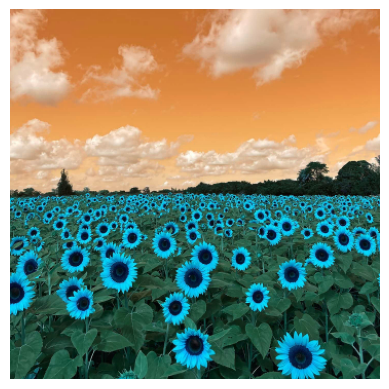

In [3]:
# Load the image
im = cv2.imread('utils/the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(im)

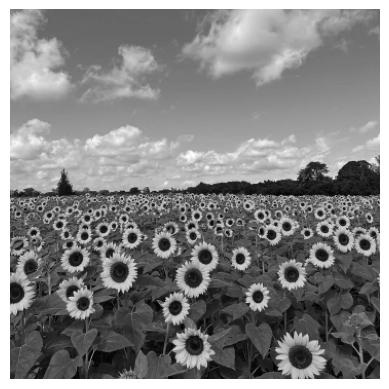

In [4]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Normalize the image
gray_image = gray_image / 255.0

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(gray_image, cmap='gray')

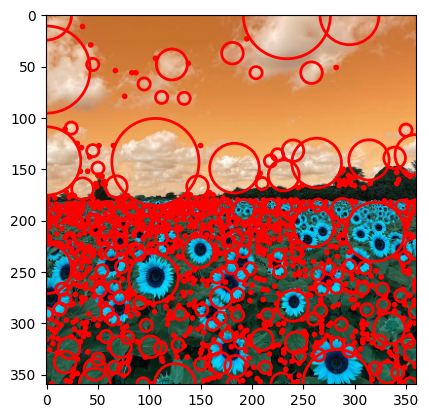

In [10]:
# Perform Laplacian of Gaussian (LoG) blob detection
# Parameters: max_sigma is the largest possible blob size, num_sigma defines the number of intermediate values for sigma
blobs_log = blob_log(gray_image, max_sigma=30, num_sigma=10, threshold=0.05)

# Compute radii in the 3rd column
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Draw detected blobs
fig, ax = plt.subplots()
ax.imshow(im)

# Loop through blobs and plot them
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

# Show the plot with the detected blobs
plt.show()

In [8]:
# Report parameters of the largest circles
largest_blobs = blobs_log[np.argsort(blobs_log[:, 2])[-5:]]  # Get the largest 5 blobs

# Print the parameters of the largest circles
for i, blob in enumerate(largest_blobs):
    y, x, r = blob
    print(f"Circle {i+1}: Center=({x:.2f}, {y:.2f}), Radius={r:.2f}")

# Report the range of sigma values used
print("Range of sigma values used: 0 to 30")

Circle 1: Center=(283.00, 359.00), Radius=33.31
Circle 2: Center=(0.00, 142.00), Radius=33.31
Circle 3: Center=(0.00, 53.00), Radius=42.43
Circle 4: Center=(106.00, 143.00), Radius=42.43
Circle 5: Center=(234.00, 0.00), Radius=42.43
Range of sigma values used: 0 to 30


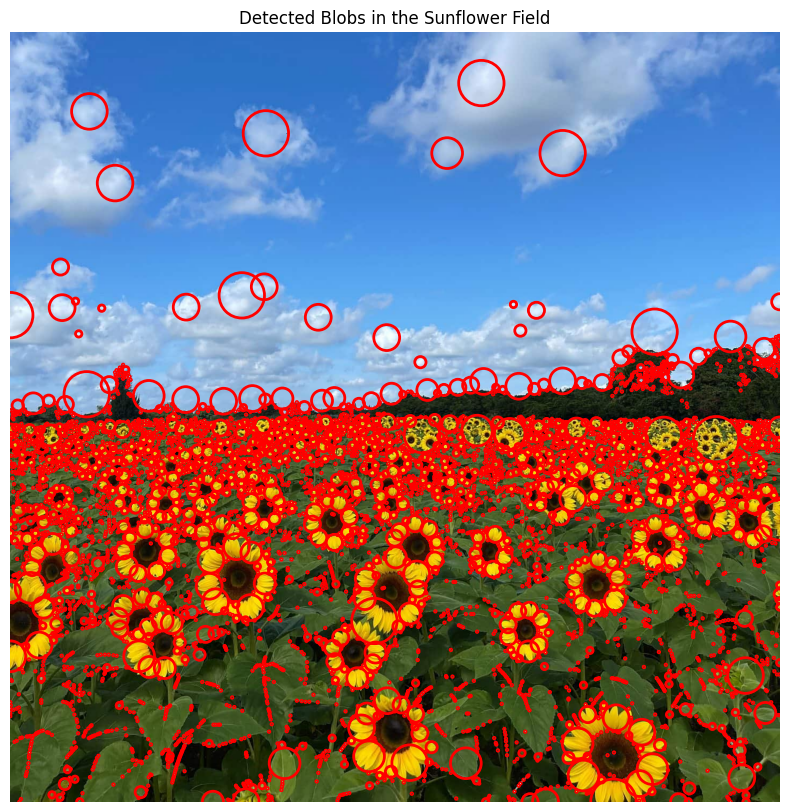

Top 5 Largest Blobs:
Blob 1: Center=(143.00, 677.00), Radius=42.43
Blob 2: Center=(478.00, 189.00), Radius=42.43
Blob 3: Center=(681.00, 1101.00), Radius=42.43
Blob 4: Center=(1320.00, 761.00), Radius=42.43
Blob 5: Center=(881.00, 95.00), Radius=42.43


In [13]:
import cv2
import numpy as np
from skimage.feature import blob_log
import matplotlib.pyplot as plt

# Load the image
image_path = 'utils/the_berry_farms_sunflower_field.jpeg'
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    raise FileNotFoundError(f"Could not load the image at path: {image_path}")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize the image (optional but helps with blob detection)
gray_image = gray_image / 255.0

# Perform Laplacian of Gaussian (LoG) blob detection
blobs_log = blob_log(gray_image, max_sigma=30, num_sigma=10, threshold=0.1)

# Compute radii for blobs
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Plot the detected blobs on the original image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Show the original image in RGB

# Loop through detected blobs and draw circles
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

# Show the plot with the blobs detected
plt.title('Detected Blobs in the Sunflower Field')
plt.axis('off')
plt.show()

# Report the parameters of the largest blobs (top 5 largest)
largest_blobs = blobs_log[np.argsort(blobs_log[:, 2])[-5:]]  # Get the largest 5 blobs by radius

print("Top 5 Largest Blobs:")
for i, blob in enumerate(largest_blobs):
    y, x, r = blob
    print(f"Blob {i+1}: Center=({x:.2f}, {y:.2f}), Radius={r:.2f}")

# Optional: Save the image with detected blobs
#output_path = '/mnt/data/sunflower_blobs_detected.jpeg'
#cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
